In [35]:
image_size = 224
batch_size = 16
epochs = 50
lr = 0.001

In [36]:
import time
import numpy
import tensorflow 
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import backend as K
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers, Model
from keras.applications.efficientnet import EfficientNetB3 , EfficientNetB7
from keras.applications import MobileNetV2, InceptionV3, DenseNet201, VGG16, Xception
from keras.optimizers import Adamax, Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MultiHeadAttention, Dense, Flatten, GlobalAveragePooling2D, Input, BatchNormalization, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
import numpy as np

In [37]:
import tensorflow as tf
from tensorflow import keras

# Load the datasets
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/plant26-hd/Data Aug New/Train',
    image_size=(image_size, image_size),
    batch_size=batch_size
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/plant26-hd/Data Aug New/Validation',
    image_size=(image_size, image_size),
    batch_size=batch_size
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/plant26-hd/Data Aug New/Test',
    image_size=(image_size, image_size),
    batch_size=batch_size
)

# Extract class names and create indices
class_names = train_dataset.class_names
class_indices = {name: index for index, name in enumerate(class_names)}
indices = {index: name for name, index in class_indices.items()}
num_classes = len(class_names)

# Normalize images
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

# Apply the process function to the datasets
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)
test_dataset = test_dataset.map(process)


print("Class Indices:", class_indices)
print("Indices to Class Names:", indices)

Found 13000 files belonging to 26 classes.
Found 639 files belonging to 26 classes.
Found 1291 files belonging to 26 classes.
Class Indices: {'Alstonia Scholaris Diseased': 0, 'Alstonia Scholaris Healthy': 1, 'Arjun Diseased': 2, 'Arjun Healthy': 3, 'Bael Diseased': 4, 'Basil Healthy': 5, 'Chinar Diseased': 6, 'Chinar Healthy': 7, 'Guava Diseased': 8, 'Guava Healthy': 9, 'Jamun Diseased': 10, 'Jamun Healthy': 11, 'Jatropha Diseased': 12, 'Jatropha Healthy': 13, 'Jute Diseased': 14, 'Jute Healthy': 15, 'Lemon Diseased': 16, 'Lemon Healthy': 17, 'Mango Diseased': 18, 'Mango Healthy': 19, 'Mulberry Diseased': 20, 'Mulberry Healthy': 21, 'Pomegranate Diseased': 22, 'Pomegranate Healthy': 23, 'Pongamia Pinnata Diseased': 24, 'Pongamia Pinnata Healthy': 25}
Indices to Class Names: {0: 'Alstonia Scholaris Diseased', 1: 'Alstonia Scholaris Healthy', 2: 'Arjun Diseased', 3: 'Arjun Healthy', 4: 'Bael Diseased', 5: 'Basil Healthy', 6: 'Chinar Diseased', 7: 'Chinar Healthy', 8: 'Guava Diseased', 9

In [38]:
img_paths = ['/kaggle/input/plant26-hd/Data Aug New/Train/Alstonia Scholaris Diseased/0014_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Alstonia Scholaris Healthy/0003_0003.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Arjun Diseased/0013_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Arjun Healthy/0002_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Bael Diseased/0016_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Basil Healthy/0008_0006.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Chinar Diseased/0022_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Chinar Healthy/0011_0003.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Guava Diseased/0015_0002.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Guava Healthy/0004_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Jamun Diseased/0017_0002.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Jamun Healthy/0005_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Jatropha Diseased/0018_0002.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Jatropha Healthy/0006_0008.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Jute Diseased/Cescospora_leaf_spot  (1).jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Jute Healthy/Healthy (10).jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Lemon Diseased/0021_0005.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Lemon Healthy/0010_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Mango Diseased/0012_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Mango Healthy/0001_0002.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Mulberry Diseased/IMG_20221216_120608.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Mulberry Healthy/Healthy_12.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Pomegranate Diseased/0020_0005.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Pomegranate Healthy/0009_0004.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Pongamia Pinnata Diseased/0019_0001.jpg',
            '/kaggle/input/plant26-hd/Data Aug New/Train/Pongamia Pinnata Healthy/0007_0002.jpg']

print(len(img_paths))

26


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model_path = "/kaggle/input/mha-efficientnetb7/tensorflow2/default/1/EfficientNetB7.h5"
model = load_model(model_path)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 64,770,227 (247.08 MB)

 Trainable params: 64,454,378 (245.87 MB)

 Non-trainable params: 315,847 (1.20 MB)

 Optimizer params: 2 (12.00 B)

In [40]:
from IPython.display import Image, display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Image size setting
img_size = 224

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        model.inputs,
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(size, size))
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)

    # display(Image(cam_path))
    return cam_path


/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


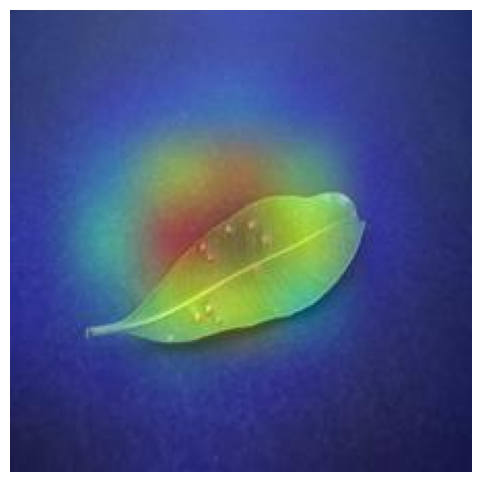

In [41]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Alstonia Scholaris Diseased/0014_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


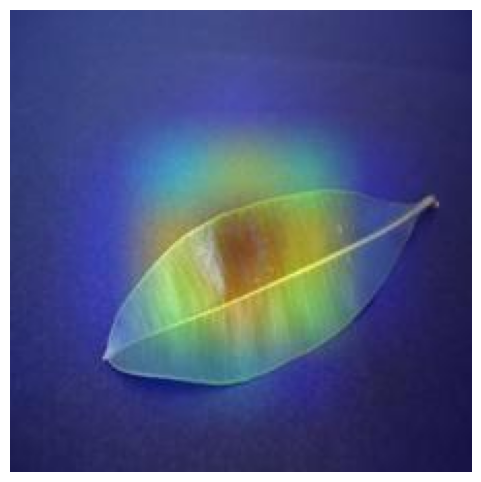

In [42]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Alstonia Scholaris Healthy/0003_0003.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


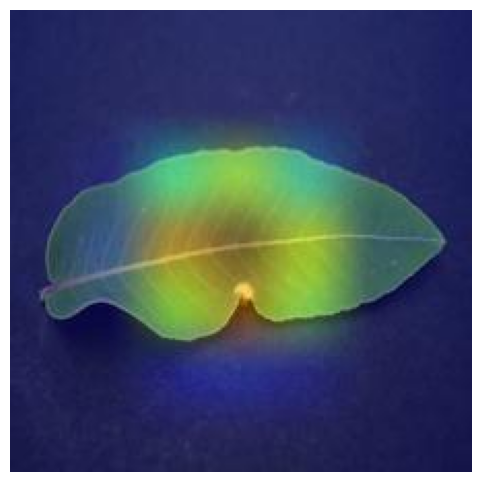

In [43]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Arjun Diseased/0013_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


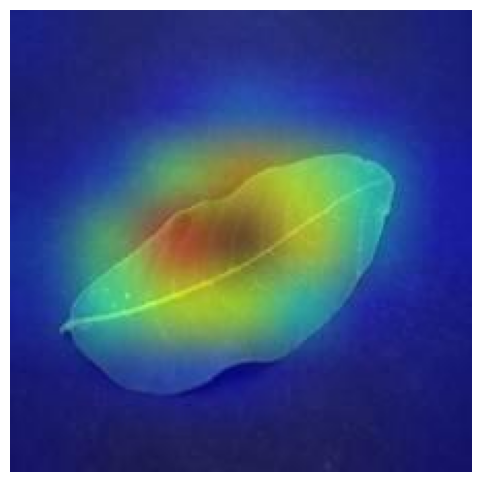

In [44]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Arjun Healthy/0002_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


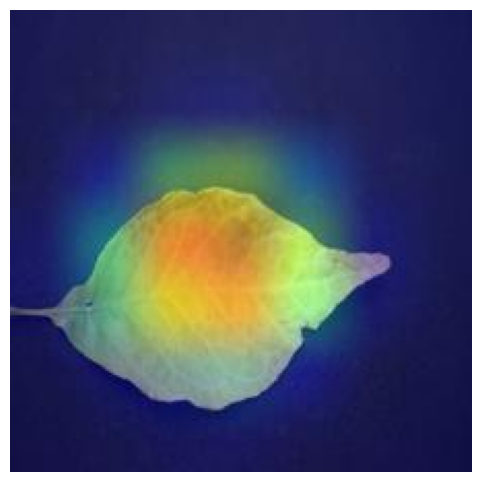

In [45]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Bael Diseased/0016_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


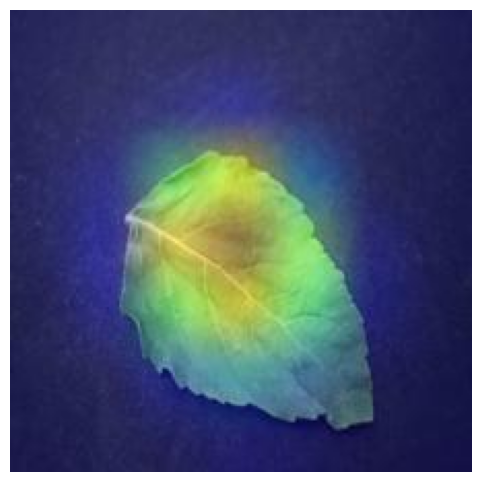

In [46]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Basil Healthy/0008_0006.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


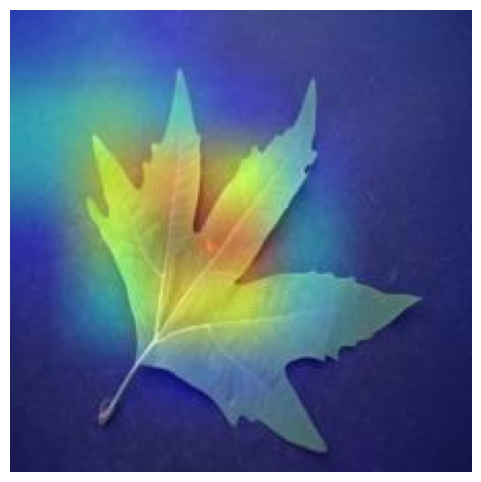

In [47]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Chinar Diseased/0022_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


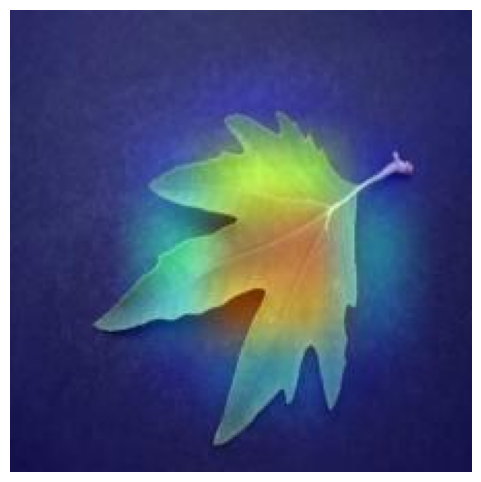

In [48]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Chinar Healthy/0011_0003.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


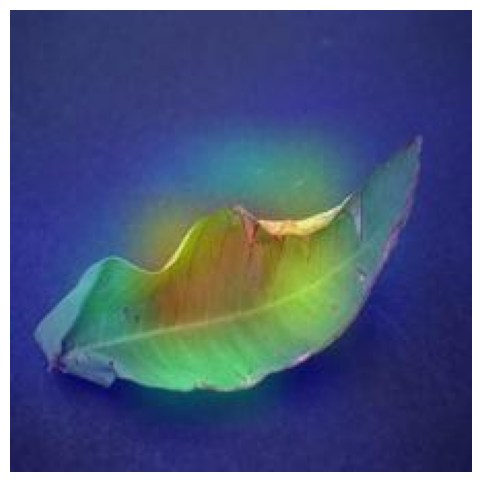

In [49]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Guava Diseased/0015_0002.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


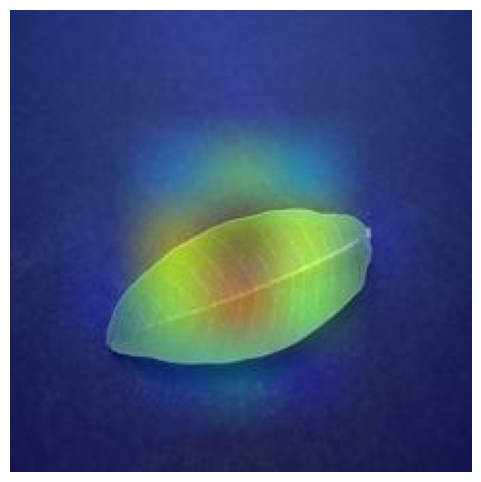

In [50]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Guava Healthy/0004_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


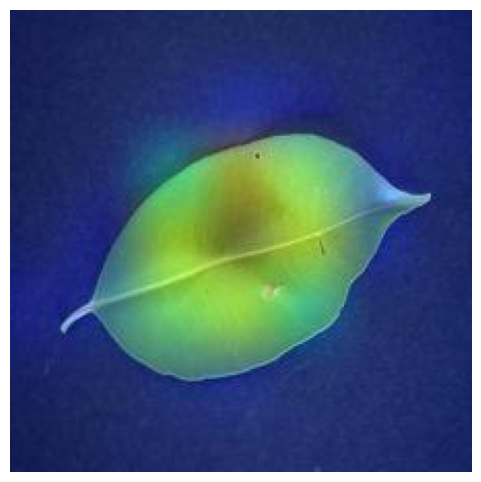

In [51]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Jamun Diseased/0017_0002.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


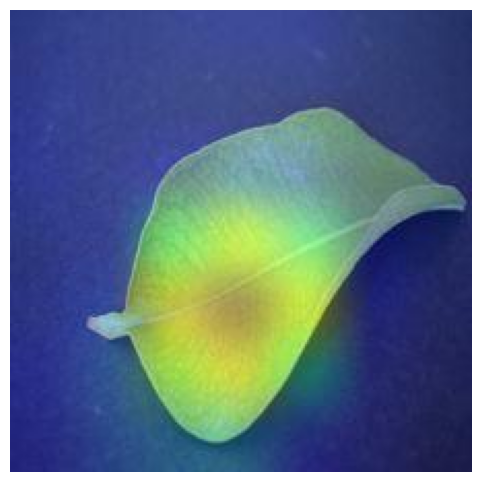

In [52]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Jamun Healthy/0005_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


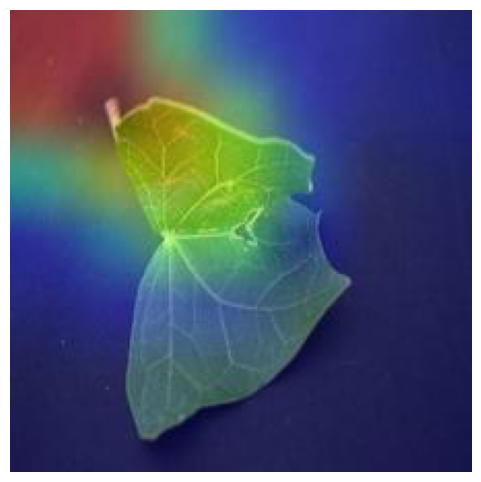

In [53]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Jatropha Diseased/0018_0002.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


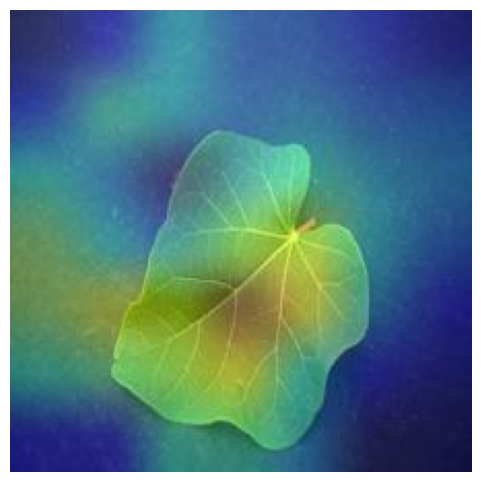

In [54]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Jatropha Healthy/0006_0008.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


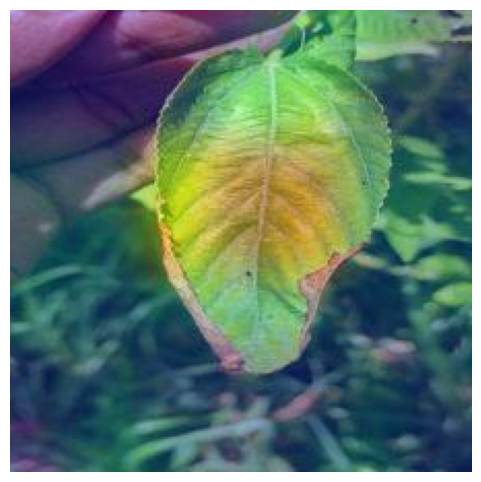

In [55]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Jute Diseased/Cescospora_leaf_spot  (1).jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


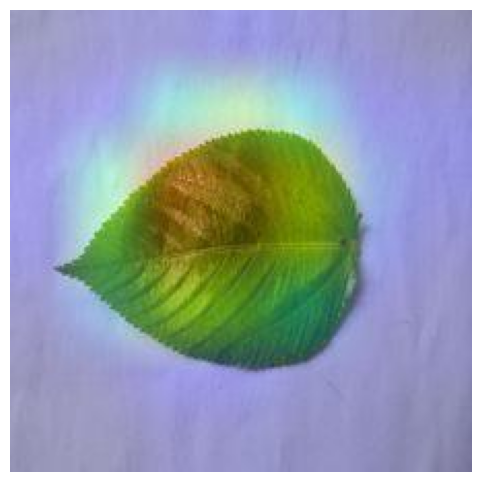

In [56]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Jute Healthy/Healthy (10).jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


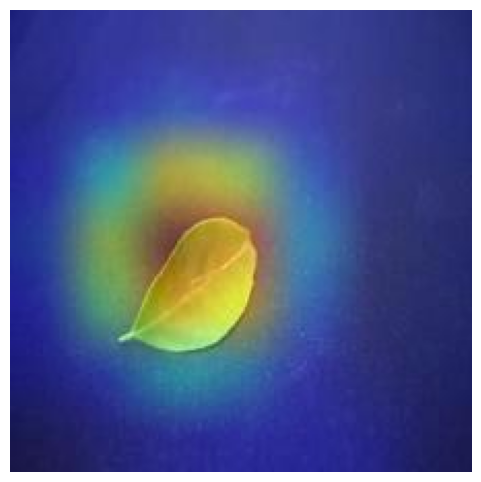

In [57]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Lemon Diseased/0021_0005.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


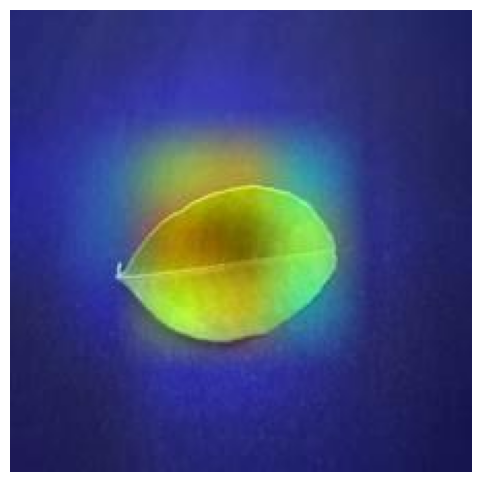

In [58]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Lemon Healthy/0010_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


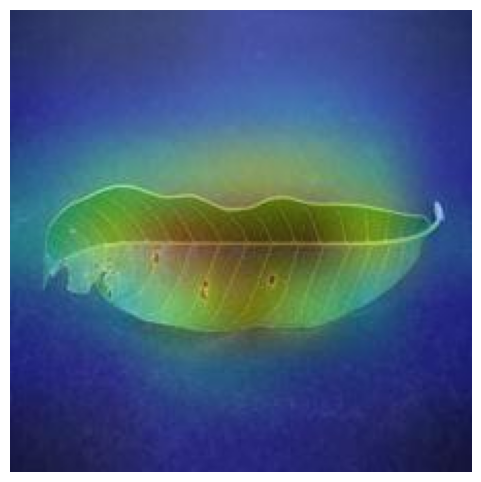

In [59]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Mango Diseased/0012_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


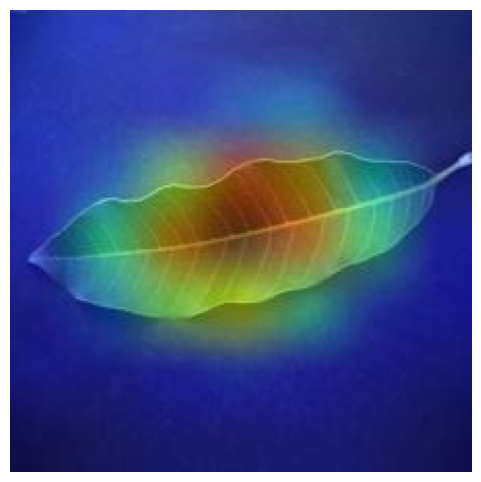

In [60]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Mango Healthy/0001_0002.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


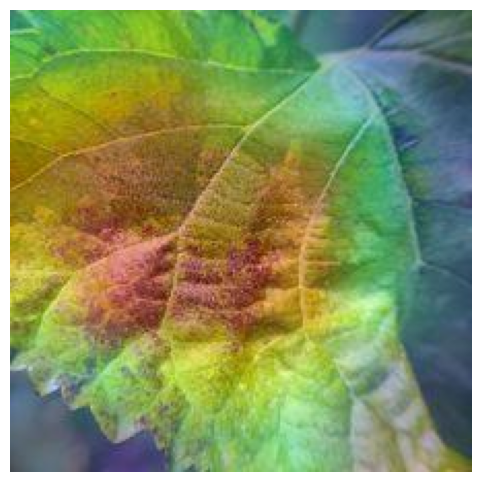

In [61]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Mulberry Diseased/IMG_20221216_120608.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


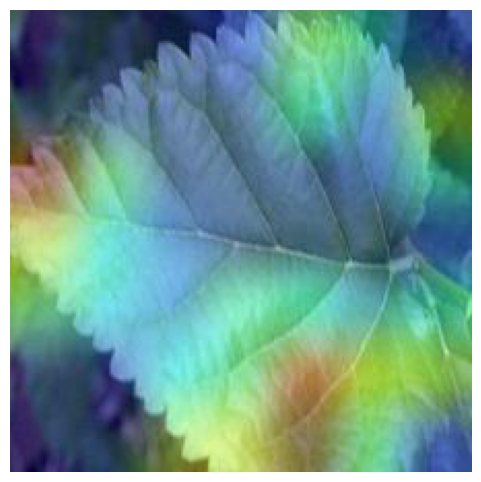

In [62]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Mulberry Healthy/Healthy_12.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


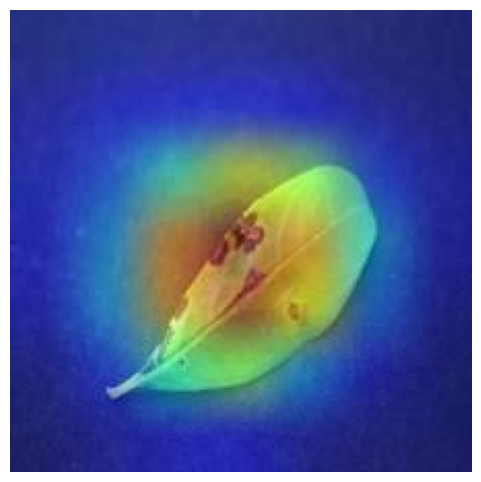

In [63]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Pomegranate Diseased/0020_0005.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


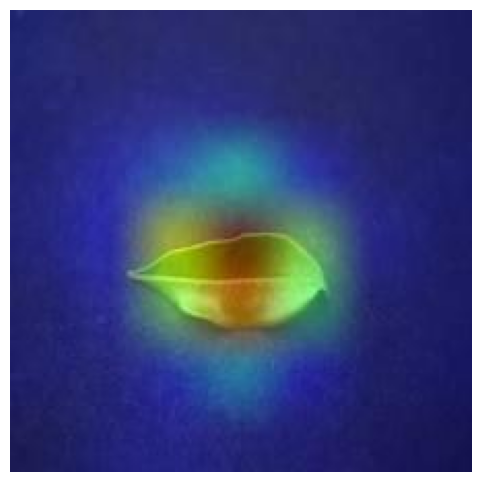

In [64]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Pomegranate Healthy/0009_0004.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


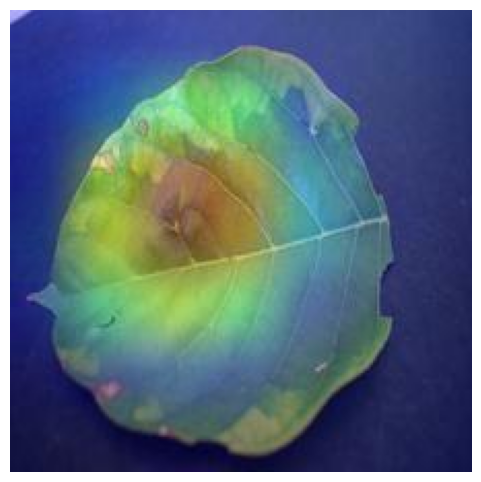

In [65]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Pongamia Pinnata Diseased/0019_0001.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()

/tmp/ipykernel_30/4094324833.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


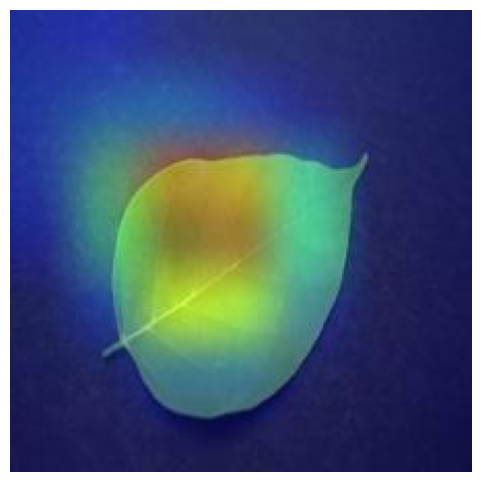

In [66]:
img_path = '/kaggle/input/plant26-hd/Data Aug New/Train/Pongamia Pinnata Healthy/0007_0002.jpg'
img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')
cam_path = save_and_display_gradcam(img_path, heatmap)

plt.figure(figsize=(6, 6))
plt.imshow(plt.imread(cam_path))
plt.axis('off')
plt.show()